In [1]:
from basicgeo import P2, P3, Partition1, Along
from PIL import Image, ImageDraw
from trianglebarmesh import TriangleBarMesh
from triangleboxing import MakeTriangleBoxing
from trianglezcut import TriZCut   # poss out of date version
from trianglezslice import TriZSlice
from ntrianglebarmesh import NTriangleBarMesh

fname = "stlexample/frameguide.stl"
bitmapx = 1824
bitmapy = 1140

def spinztox(t):
    return (t[2], t[1], -t[0])
tbarmesh = TriangleBarMesh(fname, spinztox)
trizcut = TriZCut(tbarmesh)  # this is slow because it builds the boxing

ypixes = Partition1(tbarmesh.ylo-0.2, tbarmesh.yhi+0.2, bitmapy-1)
zpix0 = tbarmesh.zlo - 0.1
zfactopix = ypixes.nparts/(ypixes.vs[-1] - ypixes.vs[0])



make triangle boxing at 0.4100000000000001


4.099999999999999
8.2
12.299999999999997
16.400000000000002
20.5
24.599999999999998
28.7
32.800000000000004
36.9


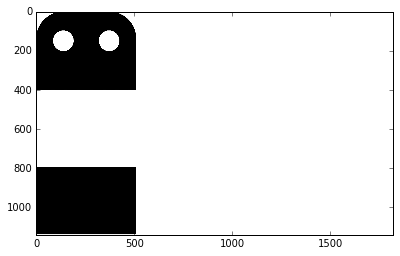

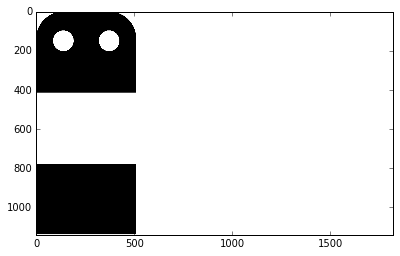

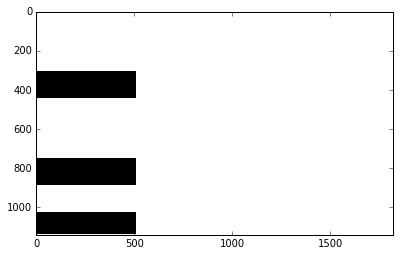

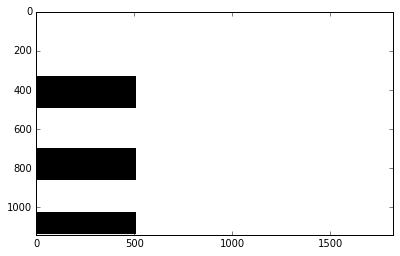

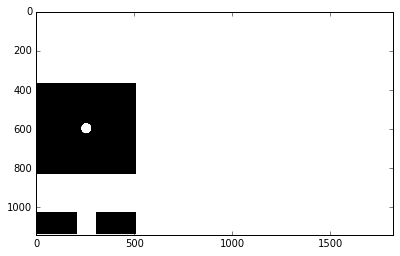

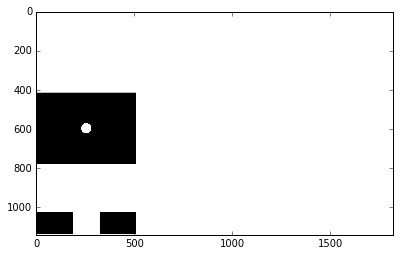

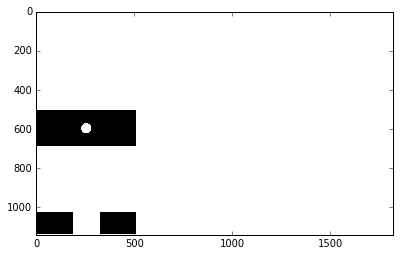

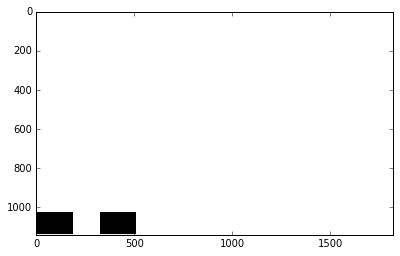

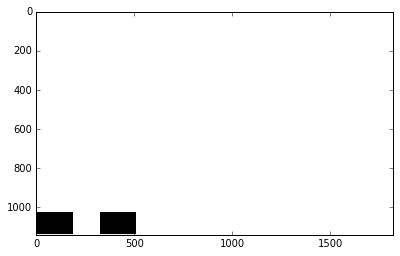

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

# this is in Z (note rotation by spinztox)
# (here we can make a loop for each slice)
xslice = Along(0.7, tbarmesh.xlo, tbarmesh.xhi)  

def slicelayer(xslice):
    imgslice = Image.new("1", (bitmapx, bitmapy), 255)
    imgslicedr = ImageDraw.Draw(imgslice)

    for iy, y in enumerate(ypixes.vs):
        ztcuts = trizcut.TriSurfCut(xslice, y)
        ztcuts.sort()
        for i in range(1, len(ztcuts), 2):
            z0 = int((ztcuts[i-1] - zpix0)*zfactopix + 0.5)
            z1 = int((ztcuts[i] - zpix0)*zfactopix + 0.5)
            imgslicedr.line([z0,iy,z1,iy], 0)  # horizontal line
    return imgslice

for i in range(1, 10):
    xslice = Along(i/10, tbarmesh.xlo, tbarmesh.xhi)
    imgslice = slicelayer(xslice)
    #imgslice.show()
    #imgslice.save(open("stlexample/images.slice%d.png" % int(xslice*1000), "wb"), "PNG")
    plt.figure(figsize=(7,4))
    plt.imshow(imgslice)
    print(xslice)
